# Movie Box Office Predictor

## Data Cleaning

In [1]:
import pandas as pd
import numpy as np

In [2]:
#import dataframes
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df1 = pd.read_csv('bom.movie_gross.csv.gz', index_col = 0)
df2 = pd.read_csv('imdb.name.basics.csv.gz', index_col = 0)
df3 = pd.read_csv('imdb.title.akas.csv.gz', index_col = 0)
df4 = pd.read_csv('imdb.title.basics.csv.gz', index_col = 0)
df5 = pd.read_csv('imdb.title.crew.csv.gz', index_col = 0)
df6 = pd.read_csv('imdb.title.principals.csv.gz', index_col = 0)
df7 = pd.read_csv('imdb.title.ratings.csv.gz', index_col = 0)
df8 = pd.read_csv('rt.movie_info.tsv.gz', sep='\t', index_col = 0)
df9 = pd.read_csv('tmdb.movies.csv.gz', index_col = 0)
df10 = pd.read_csv('tn.movie_budgets.csv.gz', index_col = 0)

In [3]:
df1.head()

,studio,domestic_gross,foreign_gross,year
title,,,,
Toy Story 3,BV,415000000.0,652000000,2010
Alice in Wonderland (2010),BV,334200000.0,691300000,2010
Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
Inception,WB,292600000.0,535700000,2010
Shrek Forever After,P/DW,238700000.0,513900000,2010


In [4]:
df2.head(250)

,primary_name,birth_year,death_year,primary_profession,known_for_titles
nconst,,,,,
nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"
nm0062879,Ruel S. Bayani,NaN,NaN,"director,production_manager,miscellaneous","tt2590280,tt0352080,tt0216559,tt2057445"
nm0063198,Bayou,NaN,NaN,actor,"tt6579724,tt0093116"
nm0063432,Stevie Be-Zet,NaN,NaN,"composer,soundtrack","tt3106212,tt0478239,tt0264917,tt1626606"
nm0063618,Jeff Beal,1963.0,NaN,"composer,music_department,soundtrack","tt0183659,tt2545118,tt0384766,tt1856010"


In [5]:
df3.head()

,ordering,title,region,language,types,attributes,is_original_title
title_id,,,,,,,
tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


In [6]:
df4.head()

,primary_title,original_title,start_year,runtime_minutes,genres
tconst,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [7]:
df5.head()

,directors,writers
tconst,,
tt0285252,nm0899854,nm0899854
tt0438973,NaN,"nm0175726,nm1802864"
tt0462036,nm1940585,nm1940585
tt0835418,nm0151540,"nm0310087,nm0841532"
tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


In [8]:
df6.head()

,ordering,nconst,category,job,characters
tconst,,,,,
tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
tt0111414,2,nm0398271,director,NaN,NaN
tt0111414,3,nm3739909,producer,producer,NaN
tt0323808,10,nm0059247,editor,NaN,NaN
tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


In [9]:
df7.head()

,averagerating,numvotes
tconst,,
tt10356526,8.3,31
tt10384606,8.9,559
tt1042974,6.4,20
tt1043726,4.2,50352
tt1060240,6.5,21


In [10]:
df8.head()

,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
id,,,,,,,,,,,
1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [11]:
df9.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [12]:
df10.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [13]:
df10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   object
 3   domestic_gross     5782 non-null   object
 4   worldwide_gross    5782 non-null   object
dtypes: object(5)
memory usage: 271.0+ KB


In [14]:
#in df10, create net profit column by subtracting production budget from worldwide gross. First, have to change datatypes to integer
df10['worldwide_gross'] = df10['worldwide_gross'].replace('[\$,]', '', regex=True).astype(int)
df10['domestic_gross'] = df10['domestic_gross'].replace('[\$,]', '', regex=True).astype(int)
df10['production_budget'] = df10['production_budget'].replace('[\$,]', '', regex=True).astype(int)

In [15]:
#rename 'primary_title' in df4 to 'movie' so that can merge it with df10
df4.rename(columns={'primary_title': 'movie'}, inplace=True)

## Feature Engineering

In [16]:
#in df10, create net profit column by subtracting production budget from worldwide gross 
df10['net_profit'] = df10['worldwide_gross'] - df10['production_budget']

In [17]:
df10.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,net_profit
id,,,,,,
1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875
3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650
4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747


In [18]:
df10['date'] = pd.to_datetime(df10['release_date'])
df10['year'], df10['month'] = df10['date'].dt.year, df10['date'].dt.month
df10.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,net_profit,date,year,month
id,,,,,,,,,
1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,2009-12-18,2009,12
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,2011-05-20,2011,5
3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,2019-06-07,2019,6
4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,2015-05-01,2015,5
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,2017-12-15,2017,12


In [19]:
del df10['date']

In [20]:
df10 = df10[['release_date', 'year', 'month', 'movie', 'production_budget', 'domestic_gross', 'worldwide_gross',
            'net_profit']]

In [21]:
df10.head()

,release_date,year,month,movie,production_budget,domestic_gross,worldwide_gross,net_profit
id,,,,,,,,
1,"Dec 18, 2009",2009,12,Avatar,425000000,760507625,2776345279,2351345279
2,"May 20, 2011",2011,5,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875
3,"Jun 7, 2019",2019,6,Dark Phoenix,350000000,42762350,149762350,-200237650
4,"May 1, 2015",2015,5,Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963
5,"Dec 15, 2017",2017,12,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747


In [22]:
df10 = df10.rename(columns={'year': 'start_year', 'month': 'release_month'})

In [23]:
df_movies = df10.merge(df4, on=['movie', 'start_year'])

In [24]:
df_movies.head()

,release_date,start_year,release_month,movie,production_budget,domestic_gross,worldwide_gross,net_profit,original_title,runtime_minutes,genres
0,"May 20, 2011",2011,5,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,Pirates of the Caribbean: On Stranger Tides,136.0,"Action,Adventure,Fantasy"
1,"Jun 7, 2019",2019,6,Dark Phoenix,350000000,42762350,149762350,-200237650,Dark Phoenix,113.0,"Action,Adventure,Sci-Fi"
2,"May 1, 2015",2015,5,Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,Avengers: Age of Ultron,141.0,"Action,Adventure,Sci-Fi"
3,"Apr 27, 2018",2018,4,Avengers: Infinity War,300000000,678815482,2048134200,1748134200,Avengers: Infinity War,149.0,"Action,Adventure,Sci-Fi"
4,"Nov 17, 2017",2017,11,Justice League,300000000,229024295,655945209,355945209,Justice League,120.0,"Action,Adventure,Fantasy"


In [25]:
df10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   start_year         5782 non-null   int64 
 2   release_month      5782 non-null   int64 
 3   movie              5782 non-null   object
 4   production_budget  5782 non-null   int64 
 5   domestic_gross     5782 non-null   int64 
 6   worldwide_gross    5782 non-null   int64 
 7   net_profit         5782 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 406.5+ KB


In [26]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1547 entries, 0 to 1546
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       1547 non-null   object 
 1   start_year         1547 non-null   int64  
 2   release_month      1547 non-null   int64  
 3   movie              1547 non-null   object 
 4   production_budget  1547 non-null   int64  
 5   domestic_gross     1547 non-null   int64  
 6   worldwide_gross    1547 non-null   int64  
 7   net_profit         1547 non-null   int64  
 8   original_title     1547 non-null   object 
 9   runtime_minutes    1521 non-null   float64
 10  genres             1541 non-null   object 
dtypes: float64(1), int64(6), object(4)
memory usage: 145.0+ KB


In [27]:
df_movies['production_budget_millions'] = df_movies['production_budget']/1000000
df_movies['domestic_gross_millions'] = df_movies['domestic_gross']/1000000
df_movies['worldwide_gross_millions'] = df_movies['worldwide_gross']/1000000
df_movies['net_profit_millions'] = df_movies['net_profit']/1000000

In [28]:
df_movies.head()

,release_date,start_year,release_month,movie,production_budget,domestic_gross,worldwide_gross,net_profit,original_title,runtime_minutes,genres,production_budget_millions,domestic_gross_millions,worldwide_gross_millions,net_profit_millions
0,"May 20, 2011",2011,5,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,Pirates of the Caribbean: On Stranger Tides,136.0,"Action,Adventure,Fantasy",410.6,241.063875,1045.663875,635.063875
1,"Jun 7, 2019",2019,6,Dark Phoenix,350000000,42762350,149762350,-200237650,Dark Phoenix,113.0,"Action,Adventure,Sci-Fi",350.0,42.762350,149.762350,-200.237650
2,"May 1, 2015",2015,5,Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,Avengers: Age of Ultron,141.0,"Action,Adventure,Sci-Fi",330.6,459.005868,1403.013963,1072.413963
3,"Apr 27, 2018",2018,4,Avengers: Infinity War,300000000,678815482,2048134200,1748134200,Avengers: Infinity War,149.0,"Action,Adventure,Sci-Fi",300.0,678.815482,2048.134200,1748.134200
4,"Nov 17, 2017",2017,11,Justice League,300000000,229024295,655945209,355945209,Justice League,120.0,"Action,Adventure,Fantasy",300.0,229.024295,655.945209,355.945209


In [29]:
pd.options.display.float_format = "{:,.1f}".format

In [30]:
df_movies.head()

,release_date,start_year,release_month,movie,production_budget,domestic_gross,worldwide_gross,net_profit,original_title,runtime_minutes,genres,production_budget_millions,domestic_gross_millions,worldwide_gross_millions,net_profit_millions
0,"May 20, 2011",2011,5,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,Pirates of the Caribbean: On Stranger Tides,136.0,"Action,Adventure,Fantasy",410.6,241.1,"1,045.7",635.1
1,"Jun 7, 2019",2019,6,Dark Phoenix,350000000,42762350,149762350,-200237650,Dark Phoenix,113.0,"Action,Adventure,Sci-Fi",350.0,42.8,149.8,-200.2
2,"May 1, 2015",2015,5,Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,Avengers: Age of Ultron,141.0,"Action,Adventure,Sci-Fi",330.6,459.0,"1,403.0","1,072.4"
3,"Apr 27, 2018",2018,4,Avengers: Infinity War,300000000,678815482,2048134200,1748134200,Avengers: Infinity War,149.0,"Action,Adventure,Sci-Fi",300.0,678.8,"2,048.1","1,748.1"
4,"Nov 17, 2017",2017,11,Justice League,300000000,229024295,655945209,355945209,Justice League,120.0,"Action,Adventure,Fantasy",300.0,229.0,655.9,355.9


In [31]:
del df_movies['production_budget']
del df_movies['domestic_gross']
del df_movies['worldwide_gross']
del df_movies['net_profit']
del df_movies['original_title']

In [32]:
df_movies.head()

,release_date,start_year,release_month,movie,runtime_minutes,genres,production_budget_millions,domestic_gross_millions,worldwide_gross_millions,net_profit_millions
0,"May 20, 2011",2011,5,Pirates of the Caribbean: On Stranger Tides,136.0,"Action,Adventure,Fantasy",410.6,241.1,"1,045.7",635.1
1,"Jun 7, 2019",2019,6,Dark Phoenix,113.0,"Action,Adventure,Sci-Fi",350.0,42.8,149.8,-200.2
2,"May 1, 2015",2015,5,Avengers: Age of Ultron,141.0,"Action,Adventure,Sci-Fi",330.6,459.0,"1,403.0","1,072.4"
3,"Apr 27, 2018",2018,4,Avengers: Infinity War,149.0,"Action,Adventure,Sci-Fi",300.0,678.8,"2,048.1","1,748.1"
4,"Nov 17, 2017",2017,11,Justice League,120.0,"Action,Adventure,Fantasy",300.0,229.0,655.9,355.9


In [33]:
#create gross to budget ratio column
df_movies['Gross_to_Budget_Ratio'] = df_movies['worldwide_gross_millions']/df_movies['production_budget_millions']
df_movies.head()

,release_date,start_year,release_month,movie,runtime_minutes,genres,production_budget_millions,domestic_gross_millions,worldwide_gross_millions,net_profit_millions,Gross_to_Budget_Ratio
0,"May 20, 2011",2011,5,Pirates of the Caribbean: On Stranger Tides,136.0,"Action,Adventure,Fantasy",410.6,241.1,"1,045.7",635.1,2.5
1,"Jun 7, 2019",2019,6,Dark Phoenix,113.0,"Action,Adventure,Sci-Fi",350.0,42.8,149.8,-200.2,0.4
2,"May 1, 2015",2015,5,Avengers: Age of Ultron,141.0,"Action,Adventure,Sci-Fi",330.6,459.0,"1,403.0","1,072.4",4.2
3,"Apr 27, 2018",2018,4,Avengers: Infinity War,149.0,"Action,Adventure,Sci-Fi",300.0,678.8,"2,048.1","1,748.1",6.8
4,"Nov 17, 2017",2017,11,Justice League,120.0,"Action,Adventure,Fantasy",300.0,229.0,655.9,355.9,2.2


In [34]:
#see how many unique genres there are
genre_counts = df_movies["genres"].value_counts()
print(genre_counts)

Drama                           68
Adventure,Animation,Comedy      67
Comedy                          56
Action,Adventure,Sci-Fi         52
Comedy,Drama,Romance            52
Comedy,Drama                    49
Comedy,Romance                  41
Action,Crime,Drama              39
Documentary                     36
Drama,Romance                   34
Action,Comedy,Crime             32
Horror,Mystery,Thriller         31
Action,Adventure,Fantasy        31
Action,Adventure,Drama          28
Drama,Thriller                  25
Horror,Thriller                 24
Action,Crime,Thriller           23
Action,Adventure,Comedy         22
Crime,Drama,Thriller            22
Horror                          20
Action,Thriller                 20
Biography,Drama,History         20
Biography,Comedy,Drama          18
Crime,Drama,Mystery             16
Biography,Drama                 16
Action,Adventure,Animation      15
Adventure,Family,Fantasy        14
Action,Drama,Thriller           14
Drama,Horror,Mystery

In [35]:
#Create Column to better define the different genres (completed all w/ 2 or more. Will manually complete the remaining)
# create a list of our conditions
conditions = [
    (df_movies['genres'] == 'Drama'),
    (df_movies['genres'] == 'Adventure,Animation,Comedy'),
    (df_movies['genres'] == 'Comedy'),
    (df_movies['genres'] == 'Action,Adventure,Sci-Fi'),
    (df_movies['genres'] == 'Comedy,Drama,Romance'),
    (df_movies['genres'] == 'Comedy,Drama'),
    (df_movies['genres'] == 'Comedy,Romance'),
    (df_movies['genres'] == 'Action,Crime,Drama'),
    (df_movies['genres'] == 'Documentary'),
    (df_movies['genres'] == 'Drama,Romance'),
    (df_movies['genres'] == 'Action,Comedy,Crime'),
    (df_movies['genres'] == 'Horror,Mystery,Thriller'),
    (df_movies['genres'] == 'Action,Adventure,Fantasy'),
    (df_movies['genres'] == 'Action,Adventure,Drama'),
    (df_movies['genres'] == 'Drama,Thriller'),
    (df_movies['genres'] == 'Horror,Thriller'),
    (df_movies['genres'] == 'Action,Crime,Thriller'),
    (df_movies['genres'] == 'Crime,Drama,Thriller'),
    (df_movies['genres'] == 'Action,Adventure,Comedy'),
    (df_movies['genres'] == 'Biography,Drama,History'),
    (df_movies['genres'] == 'Action,Thriller'),
    (df_movies['genres'] == 'Horror'),
    (df_movies['genres'] == 'Biography,Comedy,Drama'),
    (df_movies['genres'] == 'Biography,Drama'),
    (df_movies['genres'] == 'Crime,Drama,Mystery'),
    (df_movies['genres'] == 'Action,Adventure,Animation'),
    (df_movies['genres'] == 'Action,Drama,Thriller'),
    (df_movies['genres'] == 'Adventure,Family,Fantasy'),
    (df_movies['genres'] == 'Action,Adventure,Thriller'),
    (df_movies['genres'] == 'Drama,Horror,Mystery'),
    (df_movies['genres'] == 'Biography,Crime,Drama'),
    (df_movies['genres'] == 'Crime,Drama'),
    (df_movies['genres'] == 'Biography,Drama,Sport'),
    (df_movies['genres'] == 'Comedy,Crime,Drama'),
    (df_movies['genres'] == 'Adventure,Comedy,Family'),
    (df_movies['genres'] == 'Drama,Mystery,Thriller'),
    (df_movies['genres'] == 'Action,Sci-Fi,Thriller'),
    (df_movies['genres'] == 'Adventure,Comedy,Drama'),
    (df_movies['genres'] == 'Action,Adventure,Crime'),
    (df_movies['genres'] == 'Comedy,Family'),
    (df_movies['genres'] == 'Drama,Horror,Thriller'),
    (df_movies['genres'] == 'Comedy,Drama,Music'),
    (df_movies['genres'] == 'Drama,Music'),
    (df_movies['genres'] == 'Drama,Fantasy,Horror'),
    (df_movies['genres'] == 'Drama,Sport'),
    (df_movies['genres'] == 'Action,Mystery,Thriller'),
    (df_movies['genres'] == 'Action,Horror,Sci-Fi'),
    (df_movies['genres'] == 'Action,Drama,Sci-Fi'),
    (df_movies['genres'] == 'Action,Biography,Drama'),
    (df_movies['genres'] == 'Drama,Fantasy,Romance'),
    (df_movies['genres'] == 'Biography,Drama,Thriller'),
    (df_movies['genres'] == 'Crime,Thriller'),
    (df_movies['genres'] == 'Action,Fantasy,Horror'),
    (df_movies['genres'] == 'Drama,Music,Romance'),
    (df_movies['genres'] == 'Comedy,Crime'),
    (df_movies['genres'] == 'Crime,Drama,Horror'),
    (df_movies['genres'] == 'Comedy,Drama,Family'),
    (df_movies['genres'] == 'Action,Drama,History'),
    (df_movies['genres'] == 'Action,Adventure,Family'),
    (df_movies['genres'] == 'Drama,Mystery,Sci-Fi'),
    (df_movies['genres'] == 'Drama,Sci-Fi,Thriller'),
    (df_movies['genres'] == 'Drama,Family'),
    (df_movies['genres'] == 'Adventure,Animation,Family'),
    (df_movies['genres'] == 'Adventure,Comedy'),
    (df_movies['genres'] == 'Comedy,Horror'),
    (df_movies['genres'] == 'Biography,Drama,Music'),
    (df_movies['genres'] == 'Adventure,Comedy,Crime'),
    (df_movies['genres'] == 'Adventure,Drama,Fantasy'),
    (df_movies['genres'] == 'Action,Comedy,Horror'),
    (df_movies['genres'] == 'Biography,Drama,Family'),
    (df_movies['genres'] == 'Adventure,Drama,Family'),
    (df_movies['genres'] == 'Action,Animation,Comedy'),
    (df_movies['genres'] == 'Drama,Romance,Sci-Fi'),
    (df_movies['genres'] == 'Animation,Comedy,Family'),
    (df_movies['genres'] == 'Adventure,Biography,Drama'),
    (df_movies['genres'] == 'Biography,Drama,Romance'),
    (df_movies['genres'] == 'Action,Adventure,Biography'),
    (df_movies['genres'] == 'Action,Drama'),
    (df_movies['genres'] == 'Documentary,Music'),
    (df_movies['genres'] == 'Crime,Horror,Mystery'),
    (df_movies['genres'] == 'Comedy,Fantasy'),
    (df_movies['genres'] == 'Action,Comedy,Drama'),
    (df_movies['genres'] == 'Action,Drama,Fantasy'),
    (df_movies['genres'] == 'Action,Comedy,Romance'),
    (df_movies['genres'] == 'Action,Comedy,Sci-Fi'),
    (df_movies['genres'] == 'Thriller'),
    (df_movies['genres'] == 'Drama,History,War'),
    (df_movies['genres'] == 'Comedy,Drama,Fantasy'),
    (df_movies['genres'] == 'Drama,Romance,Thriller'),
    (df_movies['genres'] == 'Action,Crime,Sci-Fi'),
    (df_movies['genres'] == 'Horror,Sci-Fi,Thriller'),
    (df_movies['genres'] == 'Action,Adventure,Western'),
    (df_movies['genres'] == 'Action,Comedy'),
    (df_movies['genres'] == 'Drama,War'),
    (df_movies['genres'] == 'Drama,Family,Sport'),
    (df_movies['genres'] == 'Comedy,Music'),
    (df_movies['genres'] == 'Drama,Romance,War'),
    (df_movies['genres'] == 'Crime,Mystery,Thriller'),
    (df_movies['genres'] == 'Comedy,Music,Romance'),
    (df_movies['genres'] == 'Adventure,Comedy,Fantasy'),
    (df_movies['genres'] == 'Comedy,Crime,Thriller'),
    (df_movies['genres'] == 'Drama,Horror,Sci-Fi'),
    (df_movies['genres'] == 'Action,Adventure,Mystery'),
    (df_movies['genres'] == 'Drama,History,Thriller'),
    (df_movies['genres'] == 'Comedy,Documentary'),
    (df_movies['genres'] == 'Comedy,Fantasy,Romance'),
    (df_movies['genres'] == 'Adventure,Fantasy'),
    (df_movies['genres'] == 'Adventure,Drama,Horror'),
    (df_movies['genres'] == 'Drama,Fantasy'),
    (df_movies['genres'] == 'Action,Horror,Thriller'),
    (df_movies['genres'] == 'Horror,Mystery,Sci-Fi'),
    (df_movies['genres'] == 'Horror,Mystery'),
    (df_movies['genres'] == 'Comedy,Fantasy,Horror'),
    (df_movies['genres'] == 'Action,Drama,Sport'),
    (df_movies['genres'] == 'Drama,Horror'),
    (df_movies['genres'] == 'Action,Adventure,Horror'),
    (df_movies['genres'] == 'Animation'),
    (df_movies['genres'] == 'Fantasy'),
    (df_movies['genres'] == 'Action,Drama,Mystery'),
    (df_movies['genres'] == 'Mystery,Sci-Fi,Thriller'),
    (df_movies['genres'] == 'Action,Comedy,Fantasy'),
    (df_movies['genres'] == 'Drama,Mystery,Romance'),
    (df_movies['genres'] == 'Drama,Sci-Fi'),
    (df_movies['genres'] == 'Action,Comedy,Family'),
    (df_movies['genres'] == 'Adventure,Drama,Romance'),
    (df_movies['genres'] == 'Crime,Drama,Romance'),
    (df_movies['genres'] == 'Comedy,Mystery'),
    (df_movies['genres'] == 'Biography,Documentary'),
    (df_movies['genres'] == 'Action,Drama,Romance'),
    (df_movies['genres'] == 'Mystery,Thriller'),
    (df_movies['genres'] == 'Action'),
    (df_movies['genres'] == 'Comedy,Family,Romance'),
    (df_movies['genres'] == 'Comedy,Drama,Musical'),
    (df_movies['genres'] == 'Adventure,Drama,Sci-Fi'),
    (df_movies['genres'] == 'Action,Crime'),
    (df_movies['genres'] == 'Adventure,Drama,Thriller'),
    (df_movies['genres'] == 'Comedy,Western'),
    (df_movies['genres'] == 'Romance'),
    (df_movies['genres'] == 'Action,Drama,War'),
    (df_movies['genres'] == 'Comedy,Family,Fantasy'),
    (df_movies['genres'] == 'Family'),
    (df_movies['genres'] == 'Drama,Fantasy,Mystery'),
    (df_movies['genres'] == 'Biography,Drama,War'),
    (df_movies['genres'] == 'Fantasy,Horror,Mystery'),
    (df_movies['genres'] == 'Biography,Comedy,Crime'),
    (df_movies['genres'] == 'Biography,Documentary,Music'),
    (df_movies['genres'] == 'Comedy,Horror,Romance'),
    (df_movies['genres'] == 'Action,Biography,Crime'),
    (df_movies['genres'] == 'Drama,Western'),
    (df_movies['genres'] == 'Action,Crime,Mystery'),
    (df_movies['genres'] == 'Drama,Music,Thriller'),
    (df_movies['genres'] == 'Action,Drama,Family'),
    (df_movies['genres'] == 'Drama,History,Mystery'),
    (df_movies['genres'] == 'Documentary,Drama'),
    (df_movies['genres'] == 'Musical'),
    (df_movies['genres'] == 'Action,Fantasy,Western'),
    (df_movies['genres'] == 'Drama,Music,Musical'),
    (df_movies['genres'] == 'Family,Horror,Romance'),
    (df_movies['genres'] == 'Comedy,Crime,Romance'),
    (df_movies['genres'] == 'Family,Sci-Fi'),
    (df_movies['genres'] == 'Action,Adventure'),
    (df_movies['genres'] == 'Drama,Fantasy,Musical'),
    (df_movies['genres'] == 'Adventure,Biography,Comedy'),
    (df_movies['genres'] == 'Adventure,Family,Sci-Fi'),
    (df_movies['genres'] == 'Comedy,Music,War'),
    (df_movies['genres'] == 'Comedy,Drama,History'),
    (df_movies['genres'] == 'Action,Fantasy,War'),
    (df_movies['genres'] == 'Comedy,Mystery,Sci-Fi'),
    (df_movies['genres'] == 'Action,Crime,Sport'),
    (df_movies['genres'] == 'Adventure,Drama,Western'),
    (df_movies['genres'] == 'Adventure,Drama,Mystery'),
    (df_movies['genres'] == 'Action,Horror'),
    (df_movies['genres'] == 'Animation,Family'),
    (df_movies['genres'] == 'Adventure,Comedy,Sci-Fi'),
    (df_movies['genres'] == 'Adventure,Mystery,Sci-Fi'),
    (df_movies['genres'] == 'Documentary,Sport'),
    (df_movies['genres'] == 'Action,Biography,Documentary'),
    (df_movies['genres'] == 'Comedy,Horror,Thriller'),
    (df_movies['genres'] == 'Sci-Fi,Thriller'),
    (df_movies['genres'] == 'Action,Family,Fantasy'),
    (df_movies['genres'] == 'Adventure,Horror,Sci-Fi'),
    (df_movies['genres'] == 'Family,Fantasy,Musical'),
    (df_movies['genres'] == 'Comedy,Drama,Mystery'),
    (df_movies['genres'] == 'Drama,Family,Music'),
    (df_movies['genres'] == 'Action,Biography,Comedy'),
    (df_movies['genres'] == 'Action,Sci-Fi'),
    (df_movies['genres'] == 'Biography,Drama,Fantasy'),
    (df_movies['genres'] == 'Comedy,Sport'),
    (df_movies['genres'] == 'Drama,Thriller,Western'),
    (df_movies['genres'] == 'Comedy,Drama,Sport'),
    (df_movies['genres'] == 'Action,Sport'),
    (df_movies['genres'] == 'Drama,Fantasy,Music'),
    (df_movies['genres'] == 'Documentary,Drama,History'),
    (df_movies['genres'] == 'Sci-Fi'),
    (df_movies['genres'] == 'Horror,Sci-Fi'),
    (df_movies['genres'] == 'Drama,Mystery,War'),
    (df_movies['genres'] == 'Comedy,Fantasy,Sci-Fi'),
    (df_movies['genres'] == 'Drama,Mystery'),
    (df_movies['genres'] == 'Biography,Drama,Mystery'),
    (df_movies['genres'] == 'Adventure,Comedy,Music'),
    (df_movies['genres'] == 'Documentary,Drama,Reality-TV'),
    (df_movies['genres'] == 'Action,Crime,Horror'),
    (df_movies['genres'] == 'Action,Mystery,Sci-Fi'),
    (df_movies['genres'] == 'Comedy,Drama,Horror'),
    (df_movies['genres'] == 'Drama,History'),
    (df_movies['genres'] == 'Comedy,Sci-Fi'),
    (df_movies['genres'] == 'Adventure,Horror,Mystery'),
    (df_movies['genres'] == 'Drama,Family,Fantasy'),
    (df_movies['genres'] == 'Fantasy,Horror,Thriller'),
    (df_movies['genres'] == 'Biography,Family,Sport'),
    (df_movies['genres'] == 'Action,Adventure,Romance'),
    (df_movies['genres'] == 'Adventure,Drama'),
    (df_movies['genres'] == 'Adventure,Drama,History'),
    (df_movies['genres'] == 'Comedy,Mystery,Thriller'),
    (df_movies['genres'] == 'Comedy,Romance,Sport'),
    (df_movies['genres'] == 'Comedy,Horror,Mystery'),
    (df_movies['genres'] == 'Biography,Drama,Musical'),
    (df_movies['genres'] == 'Action,Fantasy,Thriller'),
    (df_movies['genres'] == 'Action,Comedy,Documentary'),
    (df_movies['genres'] == 'Comedy,Horror,Sci-Fi'),
    (df_movies['genres'] == 'Action,Comedy,Sport'),
    (df_movies['genres'] == 'Comedy,Crime,Horror'),
    (df_movies['genres'] == 'Romance,Sci-Fi,Thriller'),
    (df_movies['genres'] == 'Action,Crime,Fantasy'),
    (df_movies['genres'] == 'Comedy,Fantasy,Musical'),
    (df_movies['genres'] == 'Adventure,Comedy,Romance'),
    (df_movies['genres'] == 'Crime,Documentary'),
    (df_movies['genres'] == 'Crime,Drama,History'),
    (df_movies['genres'] == 'Fantasy,Musical'),
    (df_movies['genres'] == 'Music'),
    (df_movies['genres'] == 'Animation,Comedy,Drama'),
    (df_movies['genres'] == 'Western'),
    (df_movies['genres'] == 'Drama,History,Romance')
  
]

# create a list of the values we want to assign for each condition
values = ['Drama', 'Animation', 'Comedy', 'Action Sci-Fi', 'Romantic Dramedy', 'Dramedy', 'Romantic Comedy',
         'Action', 'Documentary', 'Romantic Drama', 'Action Comedy', 'Horror', 'Action Fantasy',
         'Action', 'Thriller', 'Horror', 'Action Thriller', 'Thriller', 'Action Comedy', 'Biographical Drama',
         'Action Thriller', 'Horror', 'Biographical Drama', 'Biographical Drama', 'Drama', 'Animation', 'Action Thriller',
          'Family', 'Action Thriller', 'Horror', 'Biographical Crime', 'Drama', 'Sports', 'Dramedy', 'Family', 'Thriller',
          'Action Sci-Fi', 'Dramedy', 'Action', 'Family', 'Horror', 'Music', 'Music', 'Horror',
          'Sports', 'Action Thriller', 'Horror', 'Action Sci-Fi', 'Biographical Action', 'Romantic Drama', 'Biographical Drama',
          'Thriller', 'Horror', 'Music', 'Comedy', 'Horror', 'Family', 'Historical', 'Family', 'Sci-Fi', 'Sci-Fi',
          'Family', 'Animation', 'Comedy', 'Horror Comedy', 'Biographical Music', 'Comedy', 'Fantasy', 'Horror Comedy',
          'Biographical Drama', 'Family', 'Animation', 'Romantic Drama', 'Animation', 'Biographical Drama', 'Romantic Drama',
          'Biographical Action', 'Action', 'Documentary', 'Horror', 'Comedy', 'Action Comedy', 'Action Fantasy', 'Action Comedy',
          'Action Comedy', 'Thriller', 'War', 'Comedy', 'Romantic Drama', 'Action Sci-Fi', 'Horror', 'Western', 
          'Action Comedy', 'War', 'Sports', 'Music', 'War', 'Thriller', 'Romantic Comedy', 'Comedy',
          'Thriller', 'Horror', 'Action', 'Historical', 'Documentary', 'Romantic Comedy', 'Fantasy',
          'Horror', 'Drama', 'Horror', 'Horror', 'Horror', 'Horror Comedy', 'Sports', 'Horror', 'Horror',
          'Animation', 'Fantasy', 'Action', 'Sci-Fi', 'Action Comedy', 'Romantic Drama', 'Sci-Fi',
          'Action Comedy', 'Romantic Drama', 'Romantic Drama', 'Comedy', 'Documentary', 'Romantic Drama', 'Thriller',
          'Action', 'Romantic Comedy', 'Musical', 'Sci-Fi', 'Action', 'Thriller', 'Western', 'Romantic Drama', 'War',
          'Comedy', 'Family', 'Fantasy', 'War', 'Horror', 'Biographical Crime', 'Documentary', 'Horror Comedy', 'Biographical Crime',
          'Western', 'Action', 'Music', 'Action', 'Historical', 'Documentary', 'Musical', 'Western', 'Musical',
          'Horror', 'Romantic Comedy', 'Sci-Fi', 'Action', 'Musical', 'Biographical Drama', 'Sci-Fi', 'War',
          'Dramedy', 'War', 'Comedy', 'Sports', 'Western', 'Drama', 'Horror', 'Animation', 'Comedy', 'Sci-Fi',
          'Documentary', 'Documentary', 'Horror Comedy', 'Sci-Fi', 'Action', 'Horror', 'Musical',
          'Dramedy', 'Music', 'Action Comedy', 'Action Sci-Fi', 'Biographical Drama', 'Sports', 'Western',
          'Sports', 'Sports', 'Music', 'Documentary', 'Sci-Fi', 'Horror', 'War', 'Comedy', 'Drama',
          'Biographical Drama', 'Music', 'Documentary', 'Horror', 'Action Sci-Fi', 'Horror Comedy', 'Historical',
          'Comedy', 'Horror', 'Family', 'Horror', 'Sports', 'Action', 'Drama', 'Historical', 'Comedy', 'Sports',
          'Horror Comedy', 'Musical', 'Action Thriller', 'Documentary', 'Horror Comedy', 'Sports',
          'Horror Comedy', 'Sci-Fi', 'Action', 'Musical', 'Romantic Comedy', 'Documentary', 'Historical',
          'Musical', 'Music', 'Animation', 'Western', 'Romantic Drama'
          
          
         ] 

# create a new column and use np.select to assign values to it using our lists as arguments
df_movies['Genre'] = np.select(conditions, values)

# display updated DataFrame
df_movies.head(50)

,release_date,start_year,release_month,movie,runtime_minutes,genres,production_budget_millions,domestic_gross_millions,worldwide_gross_millions,net_profit_millions,Gross_to_Budget_Ratio,Genre
0,"May 20, 2011",2011,5,Pirates of the Caribbean: On Stranger Tides,136.0,"Action,Adventure,Fantasy",410.6,241.1,"1,045.7",635.1,2.5,Action Fantasy
1,"Jun 7, 2019",2019,6,Dark Phoenix,113.0,"Action,Adventure,Sci-Fi",350.0,42.8,149.8,-200.2,0.4,Action Sci-Fi
2,"May 1, 2015",2015,5,Avengers: Age of Ultron,141.0,"Action,Adventure,Sci-Fi",330.6,459.0,"1,403.0","1,072.4",4.2,Action Sci-Fi
3,"Apr 27, 2018",2018,4,Avengers: Infinity War,149.0,"Action,Adventure,Sci-Fi",300.0,678.8,"2,048.1","1,748.1",6.8,Action Sci-Fi
4,"Nov 17, 2017",2017,11,Justice League,120.0,"Action,Adventure,Fantasy",300.0,229.0,655.9,355.9,2.2,Action Fantasy
5,"Nov 6, 2015",2015,11,Spectre,148.0,"Action,Adventure,Thriller",300.0,200.1,879.6,579.6,2.9,Action Thriller
6,"Jul 20, 2012",2012,7,The Dark Knight Rises,164.0,"Action,Thriller",275.0,448.1,"1,084.4",809.4,3.9,Action Thriller
7,"May 25, 2018",2018,5,Solo: A Star Wars Story,135.0,"Action,Adventure,Fantasy",275.0,213.8,393.2,118.2,1.4,Action Fantasy
8,"Jul 2, 2013",2013,7,The Lone Ranger,150.0,"Action,Adventure,Western",275.0,89.3,260.0,-15.0,0.9,Western
9,"Mar 9, 2012",2012,3,John Carter,132.0,"Action,Adventure,Sci-Fi",275.0,73.1,282.8,7.8,1.0,Action Sci-Fi


In [36]:
#see how many unique genres there are pt. 2
genre_counts = df_movies["Genre"].value_counts()
print(genre_counts)

Horror                 166
Animation              102
Drama                  102
Action                  98
Comedy                  94
Action Thriller         79
Thriller                78
Action Sci-Fi           76
Action Comedy           74
Biographical Drama      74
Dramedy                 72
Romantic Drama          66
Family                  60
Documentary             54
Romantic Dramedy        52
Romantic Comedy         51
Action Fantasy          35
Music                   34
Sports                  33
Sci-Fi                  24
Horror Comedy           21
War                     17
Biographical Crime      17
Historical              13
Fantasy                 12
Western                 11
Biographical Action     11
Musical                  9
Biographical Music       6
0                        6
Name: Genre, dtype: int64


In [37]:
#check what movies don't have a value in updated Genre column
df_movies[df_movies['Genre'] == '0']

,release_date,start_year,release_month,movie,runtime_minutes,genres,production_budget_millions,domestic_gross_millions,worldwide_gross_millions,net_profit_millions,Gross_to_Budget_Ratio,Genre
227,"Nov 21, 2018",2018,11,Robin Hood,nan,NaN,99.0,30.8,84.7,-14.3,0.9,0
457,"Mar 19, 2010",2010,3,The Bounty Hunter,nan,NaN,45.0,67.1,135.8,90.8,3.0,0
904,"Aug 22, 2014",2014,8,The Prince,71.0,NaN,18.0,0.0,0.0,-18.0,0.0,0
1296,"Dec 2, 2016",2016,12,Believe,nan,NaN,3.5,0.9,0.9,-2.6,0.3,0
1485,"Jun 23, 2015",2015,6,Crossroads,nan,NaN,0.5,0.0,0.0,-0.5,0.0,0
1543,"Sep 1, 2015",2015,9,Exeter,92.0,NaN,0.0,0.0,0.5,0.5,19.6,0


In [38]:
#manually edit Genre for the reamining movies (looked up genres per imdb)
df_movies.loc[df_movies['movie'] == 'Robin Hood', 'Genre'] = "Action"
df_movies.loc[df_movies['movie'] == 'The Bounty Hunter', 'Genre'] = "Action Comedy"
df_movies.loc[df_movies['movie'] == 'The Prince', 'Genre'] = "Action Thriller"
df_movies.loc[df_movies['movie'] == 'Believe', 'Genre'] = "Drama"
df_movies.loc[df_movies['movie'] == 'Crossroads', 'Genre'] = "Drama"
df_movies.loc[df_movies['movie'] == 'Exeter', 'Genre'] = "Horror"

In [39]:
df_movies.isnull().sum()

release_date                   0
start_year                     0
release_month                  0
movie                          0
runtime_minutes               26
genres                         6
production_budget_millions     0
domestic_gross_millions        0
worldwide_gross_millions       0
net_profit_millions            0
Gross_to_Budget_Ratio          0
Genre                          0
dtype: int64

In [40]:
del df_movies['genres']

In [41]:
df_movies = df_movies.dropna(how='any',axis=0) 

In [42]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1521 entries, 0 to 1546
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   release_date                1521 non-null   object 
 1   start_year                  1521 non-null   int64  
 2   release_month               1521 non-null   int64  
 3   movie                       1521 non-null   object 
 4   runtime_minutes             1521 non-null   float64
 5   production_budget_millions  1521 non-null   float64
 6   domestic_gross_millions     1521 non-null   float64
 7   worldwide_gross_millions    1521 non-null   float64
 8   net_profit_millions         1521 non-null   float64
 9   Gross_to_Budget_Ratio       1521 non-null   float64
 10  Genre                       1521 non-null   object 
dtypes: float64(6), int64(2), object(3)
memory usage: 142.6+ KB


In [43]:
df_movies.isnull().sum()

release_date                  0
start_year                    0
release_month                 0
movie                         0
runtime_minutes               0
production_budget_millions    0
domestic_gross_millions       0
worldwide_gross_millions      0
net_profit_millions           0
Gross_to_Budget_Ratio         0
Genre                         0
dtype: int64

In [44]:
#see how many unique genres there are pt. 3
genre_counts = df_movies["Genre"].value_counts()
print(genre_counts)

Horror                 164
Animation              101
Action                  98
Drama                   96
Comedy                  93
Action Thriller         79
Thriller                78
Action Sci-Fi           76
Biographical Drama      74
Action Comedy           73
Dramedy                 71
Romantic Drama          65
Family                  59
Romantic Dramedy        52
Romantic Comedy         51
Documentary             49
Action Fantasy          35
Music                   34
Sports                  33
Sci-Fi                  24
Horror Comedy           21
War                     17
Biographical Crime      17
Fantasy                 12
Historical              12
Western                 11
Biographical Action     11
Musical                  9
Biographical Music       6
Name: Genre, dtype: int64


In [53]:
df_movies['runtime_minutes'].describe()

count   1,521.0
mean      106.7
std        19.1
min         4.0
25%        94.0
50%       105.0
75%       117.0
max       180.0
Name: runtime_minutes, dtype: float64

In [54]:
#create categories to describe movie lengths
bins = [4, 94, 105, 117, 180]  #defining bins

review_bins = ["Very Short", "Short", "Long", "Very Long"]  #labeling the bins

df_movies["movie_length"] = pd.cut(df_movies["runtime_minutes"], bins, labels = review_bins) #making a new column with binned values

df_movies.head()  #checked to see new column that was created from binning



,release_date,start_year,release_month,movie,runtime_minutes,production_budget_millions,domestic_gross_millions,worldwide_gross_millions,net_profit_millions,Gross_to_Budget_Ratio,Genre,movie_length
0,"May 20, 2011",2011,5,Pirates of the Caribbean: On Stranger Tides,136.0,410.6,241.1,"1,045.7",635.1,2.5,Action Fantasy,Very Long
1,"Jun 7, 2019",2019,6,Dark Phoenix,113.0,350.0,42.8,149.8,-200.2,0.4,Action Sci-Fi,Long
2,"May 1, 2015",2015,5,Avengers: Age of Ultron,141.0,330.6,459.0,"1,403.0","1,072.4",4.2,Action Sci-Fi,Very Long
3,"Apr 27, 2018",2018,4,Avengers: Infinity War,149.0,300.0,678.8,"2,048.1","1,748.1",6.8,Action Sci-Fi,Very Long
4,"Nov 17, 2017",2017,11,Justice League,120.0,300.0,229.0,655.9,355.9,2.2,Action Fantasy,Very Long


## EDA

In [45]:
#check average gross per movie by month
df_movies['worldwide_gross_millions'].groupby(df_movies['release_month']).describe()

,count,mean,std,min,25%,50%,75%,max
release_month,,,,,,,,
1,70.0,81.0,82.5,0.0,31.5,56.2,103.6,517.6
2,92.0,140.0,193.2,0.0,33.0,66.1,177.0,"1,348.3"
3,130.0,173.0,253.7,0.0,13.5,75.4,201.5,"1,259.2"
4,98.0,152.1,311.0,0.0,16.6,54.3,109.0,"2,048.1"
5,102.0,240.0,327.0,0.0,10.9,84.8,337.7,"1,517.9"
6,121.0,227.1,334.7,0.0,9.5,70.0,328.3,"1,648.9"
7,127.0,189.3,252.0,0.0,14.7,94.2,245.5,"1,160.3"
8,126.0,90.3,131.8,0.0,7.2,48.7,103.6,770.9
9,149.0,65.8,101.1,0.0,3.7,30.8,84.4,697.5


In [46]:
#create bar chart to illustrate average gross per movie by month
result = df_movies['worldwide_gross_millions'].groupby(df_movies['release_month']).mean()

[Text(0, 0, 'Jan'),
 Text(0, 0, 'Feb'),
 Text(0, 0, 'Mar'),
 Text(0, 0, 'Apr'),
 Text(0, 0, 'May'),
 Text(0, 0, 'June'),
 Text(0, 0, 'July'),
 Text(0, 0, 'Aug'),
 Text(0, 0, 'Sept'),
 Text(0, 0, 'Oct'),
 Text(0, 0, 'Nov'),
 Text(0, 0, 'Dec')]

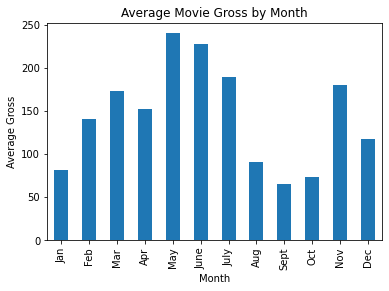

In [47]:
#create bar chart to illustrate average gross per movie by month
chart = df_movies['worldwide_gross_millions'].groupby(df_movies['release_month']).mean().plot(kind='bar')
chart.set_title('Average Movie Gross by Month')
chart.set_xlabel('Month')
chart.set_ylabel('Average Gross')
labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
chart.set_xticklabels(labels)


In [48]:
#check average gross per movie by year
df_movies['worldwide_gross_millions'].groupby(df_movies['start_year']).describe()

,count,mean,std,min,25%,50%,75%,max
start_year,,,,,,,,
2010,176.0,120.3,192.9,0.0,7.9,48.8,145.0,"1,068.9"
2011,181.0,110.5,171.2,0.0,7.6,50.1,140.4,"1,123.8"
2012,162.0,144.0,237.3,0.0,10.5,50.5,168.6,"1,517.9"
2013,176.0,134.2,218.1,0.0,8.6,51.4,156.8,"1,272.5"
2014,189.0,129.3,206.7,0.0,0.2,39.0,156.6,"1,104.0"
2015,201.0,117.9,244.0,0.0,0.5,32.9,105.0,"1,648.9"
2016,163.0,154.2,242.4,0.0,10.5,55.3,171.6,"1,140.1"
2017,120.0,207.7,278.1,0.0,22.9,80.8,270.1,"1,259.2"
2018,119.0,190.8,322.1,0.0,25.7,75.9,180.7,"2,048.1"


In [49]:
#remove the one observation from 2020 because of incomplete data
df_movies = df_movies[df_movies['start_year'] != 2020]

Text(0, 0.5, 'Average Gross')

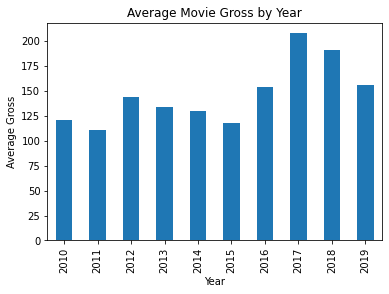

In [50]:
#create bar chart to illustrate average gross per movie by month
chart = df_movies['worldwide_gross_millions'].groupby(df_movies['start_year']).mean().plot(kind='bar')
chart.set_title('Average Movie Gross by Year')
chart.set_xlabel('Year')
chart.set_ylabel('Average Gross')

In [51]:
#check average gross per movie by genre
df_movies['worldwide_gross_millions'].groupby(df_movies['Genre']).describe()

,count,mean,std,min,25%,50%,75%,max
Genre,,,,,,,,
Action,98.0,105.8,133.8,0.0,16.1,56.0,147.8,710.6
Action Comedy,73.0,181.4,230.9,0.0,28.7,107.7,229.2,964.5
Action Fantasy,35.0,370.0,314.0,11.0,102.3,273.5,602.8,"1,146.9"
Action Sci-Fi,76.0,514.0,444.1,0.0,165.8,393.6,722.8,"2,048.1"
Action Thriller,79.0,181.6,288.6,0.0,22.5,76.2,200.3,"1,518.7"
Animation,101.0,377.2,313.6,0.0,122.5,311.0,554.6,"1,272.5"
Biographical Action,11.0,185.9,196.0,5.0,41.2,98.2,258.0,547.3
Biographical Crime,17.0,47.7,94.3,0.2,3.7,11.8,42.4,389.9
Biographical Drama,74.0,72.8,78.5,0.0,17.0,40.7,97.8,322.0


In [55]:
genres = pd.get_dummies(df_movies.Genre).iloc[:, 1:]
length = pd.get_dummies(df_movies.movie_length).iloc[:, 1:]
df_movies = pd.concat([df_movies, genres, length], axis = 1)

In [56]:
df_movies.head()

,release_date,start_year,release_month,movie,runtime_minutes,production_budget_millions,domestic_gross_millions,worldwide_gross_millions,net_profit_millions,Gross_to_Budget_Ratio,Genre,movie_length,Action Comedy,Action Fantasy,Action Sci-Fi,Action Thriller,Animation,Biographical Action,Biographical Crime,Biographical Drama,Biographical Music,Comedy,Documentary,Drama,Dramedy,Family,Fantasy,Historical,Horror,Horror Comedy,Music,Musical,Romantic Comedy,Romantic Drama,Romantic Dramedy,Sci-Fi,Sports,Thriller,War,Western,Short,Long,Very Long
0,"May 20, 2011",2011,5,Pirates of the Caribbean: On Stranger Tides,136.0,410.6,241.1,"1,045.7",635.1,2.5,Action Fantasy,Very Long,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,"Jun 7, 2019",2019,6,Dark Phoenix,113.0,350.0,42.8,149.8,-200.2,0.4,Action Sci-Fi,Long,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,"May 1, 2015",2015,5,Avengers: Age of Ultron,141.0,330.6,459.0,"1,403.0","1,072.4",4.2,Action Sci-Fi,Very Long,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,"Apr 27, 2018",2018,4,Avengers: Infinity War,149.0,300.0,678.8,"2,048.1","1,748.1",6.8,Action Sci-Fi,Very Long,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,"Nov 17, 2017",2017,11,Justice League,120.0,300.0,229.0,655.9,355.9,2.2,Action Fantasy,Very Long,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
